# AI Engineer Internship Project
## Project - PRAICP-1012-Pneumonia chest x-ray classification2
## Project Goal:
### Develop a machine learning model that can  classify the x-ray image of chest.
## Contribution - Individual


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
import zipfile  # Importing zipfile module to work with ZIP files

# Extracting ZIP file from Google Drive to 'xray_data' folder in current directory
with zipfile.ZipFile("/content/drive/MyDrive/chest_xray.zip", 'r') as zip_ref:
    zip_ref.extractall("xray_data")


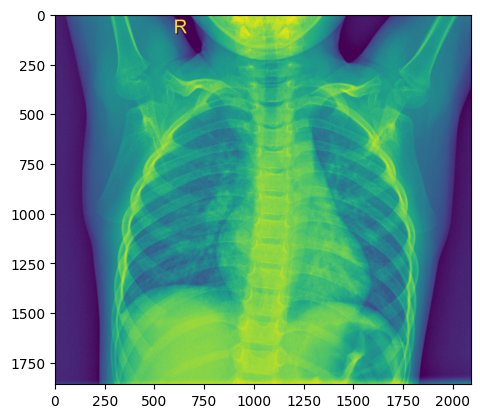

In [ ]:
import matplotlib.image as mpimg  # Importing image reading function from matplotlib

# Reading the image file from the path
my_img = mpimg.imread('/content/xray_data/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

plt.imshow(my_img)


In [ ]:
my_img.shape #checking shape of an image

(1858, 2090)

In [ ]:
# Defining path to the training,testing and validation dataset directory
train_d = '/content/xray_data/chest_xray/train'
test_d = '/content/xray_data/chest_xray/test'
valid_d = '/content/xray_data/chest_xray/val'

In [ ]:
# Setting perimeters
img_height = 224
img_width = 224
batch_size = 32

In [ ]:
# Loading training,testing and Validation images from directory as a TensorFlow dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_d,
    color_mode = 'grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_d,
    color_mode = 'grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_d,
    color_mode = 'grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


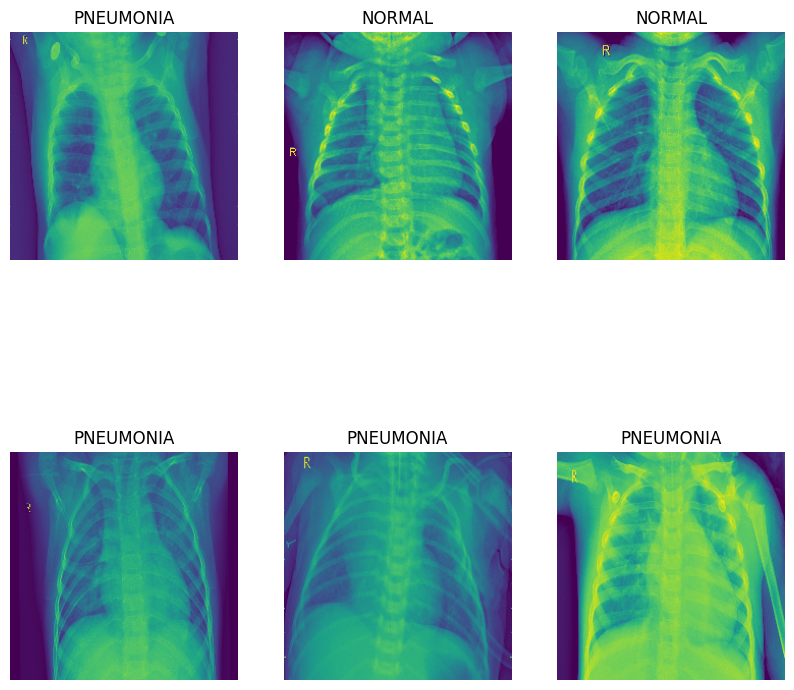

In [ ]:
plt.figure(figsize=(10,10))  # Setting figure size

# Taking one batch of images and labels from the training dataset
for images, labels in train_data.take(1):
  for i in range(6):  # Looping through the first 6 images in the batch
    plt.subplot(2, 3, i + 1)  # Creating a 2x3 grid of subplots
    plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))  # Displaying image
    plt.title(train_data.class_names[labels[i]])  # Showing class name as title
    plt.axis('off')  # Hiding tick marks etc.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # Optimizing performance by letting TensorFlow choose the best buffer size

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)# it will take the data in memory for faster training
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input normalization layer
model.add(Rescaling(1./255, input_shape=(224, 224, 1)))  # Normalize pixel values

# First Conv block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Second Conv block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Third Conv block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

# Fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (Normal vs Pneumonia)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(train_data, validation_data=valid_data, epochs=10) #Traning the model

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.7422 - loss: 0.5580 - val_accuracy: 0.9375 - val_loss: 0.4612
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9390 - loss: 0.2443 - val_accuracy: 0.9375 - val_loss: 0.3995
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9574 - loss: 0.2115 - val_accuracy: 0.8750 - val_loss: 0.3977
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9636 - loss: 0.1892 - val_accuracy: 0.8750 - val_loss: 0.3629
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9710 - loss: 0.1668 - val_accuracy: 1.0000 - val_loss: 0.2416
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.9816 - loss: 0.1422 - val_accuracy: 0.9375 - val_loss: 0.3847
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9823 - loss: 0.1306 - val_accuracy: 0.9375 - val_loss: 0.2848
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.9827 - loss: 0.1173 - val_accu

In [ ]:
model.evaluate(test_data) # evaluating the model

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 562ms/step - accuracy: 0.7833 - loss: 1.3801


[1.5937803983688354, 0.7612179517745972]